# SNPs tested per gene


In [1]:
options(jupyter.plot_mimetypes = 'image/png')

### Imports

In [13]:
library(ggplot2)
library(extrafont)
library(scales)
library(reshape2)
library(forcats)
library(ggrepel)
library(patchwork)
library(cowplot)
library(viridis)
library(ggsignif)

In [11]:
source("https://gist.githubusercontent.com/benmarwick/2a1bb0133ff568cbe28d/raw/fb53bd97121f7f9ce947837ef1a4c65a73bffb3f/geom_flat_violin.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
theme_Publication <- function(base_size=14, base_family="Helvetica") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_line(colour="#f0f0f0"),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "bottom",
               legend.direction = "horizontal",
               legend.key.size= unit(0.2, "cm"),
               legend.spacing = unit(0, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
      
}

scale_fill_Publication <- function(...){
      library(scales)
      discrete_scale("fill","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

scale_colour_Publication <- function(...){
      library(scales)
      discrete_scale("colour","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

## Analysis

### Ohnologs

#### Bonferroni-corrected eQTLs

In [5]:
propSNPsSignificanteQTLsOhnologsBonferroni <- read.csv(file="../../outputFiles/propSNPsSignificanteQTLsOhnologsBonferroni.csv", header=TRUE)

In [6]:
summary(propSNPsSignificanteQTLsOhnologsBonferroni)

 Ensembl.Gene.ID        type              field                SNPs      
 Length:790141      Length:790141      Length:790141      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6104  
 Mode  :character   Mode  :character   Mode  :character   Median : 7160  
                                                          Mean   : 7199  
                                                          3rd Qu.: 8125  
                                                          Max.   :28260  
     eQTLs           propSignif          tissue         
 Min.   :   0.00   Min.   :0.000000   Length:790141     
 1st Qu.:   0.00   1st Qu.:0.000000   Class :character  
 Median :   0.00   Median :0.000000   Mode  :character  
 Mean   :  17.65   Mean   :0.002585                     
 3rd Qu.:   0.00   3rd Qu.:0.000000                     
 Max.   :4540.00   Max.   :0.524256                     

In [32]:
propSNPsSignificanteQTLsOhnologsBonferroni$type2 <- factor(propSNPsSignificanteQTLsOhnologsBonferroni$type, levels = c('ohno', 'SSD', 'singleton'))

In [46]:
summary(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero)

 Ensembl.Gene.ID        type              field                SNPs      
 Length:146224      Length:146224      Length:146224      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6235  
 Mode  :character   Mode  :character   Mode  :character   Median : 7289  
                                                          Mean   : 7396  
                                                          3rd Qu.: 8284  
                                                          Max.   :28243  
     eQTLs           propSignif           tissue                type2      
 Min.   :   1.00   Min.   :0.0000354   Length:146224      ohno     :43754  
 1st Qu.:   8.00   1st Qu.:0.0011620   Class :character   SSD      :53283  
 Median :  38.00   Median :0.0052562   Mode  :character   singleton:49187  
 Mean   :  95.36   Mean   :0.0139685                                       
 3rd Qu.: 113.00   3rd Qu.:0.0161580                                       
 Max.   :4540.00   Max.   

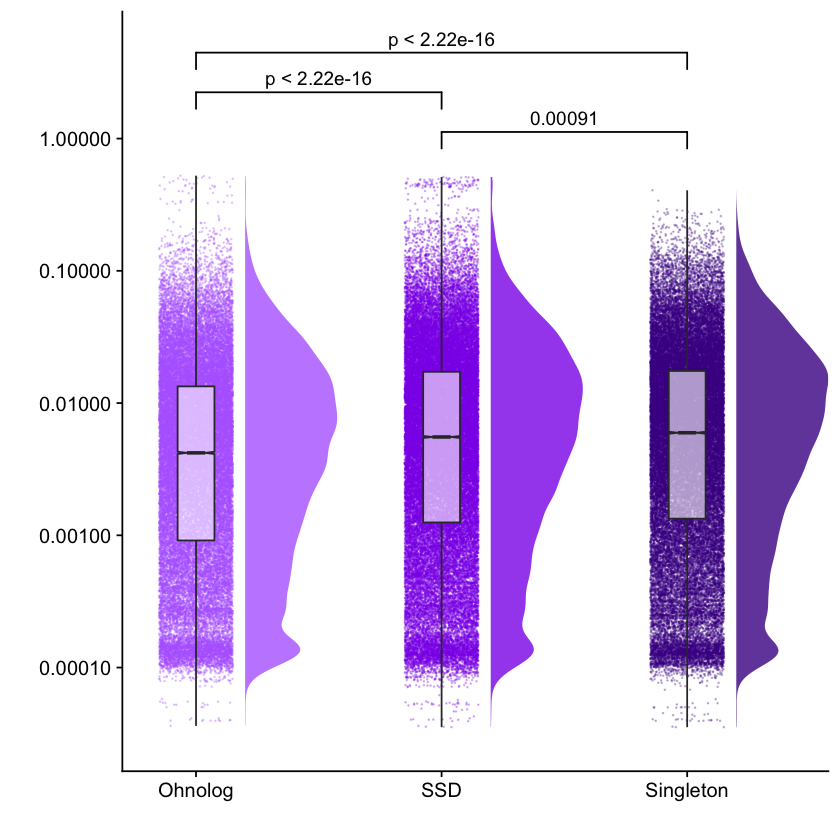

In [226]:
propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero <- propSNPsSignificanteQTLsOhnologsBonferroni[ which(propSNPsSignificanteQTLsOhnologsBonferroni$propSignif > 0),]
ohno_raincloud_bonferroni <- ggplot(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero, aes(type2, propSignif)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = type2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = type2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma, limits=c(0.00003,5)) +
    scale_x_discrete(name="",
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    scale_fill_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    theme(legend.position="none") +
    geom_signif(y_position=c(0.65, 0.35, 0.05), comparisons = list(c("ohno", "singleton"), c("ohno", "SSD"), c("SSD", "singleton")),
               textsize=4, test = "wilcox.test")
ohno_raincloud_bonferroni

##### Test difference in number of SNPs

Ohnos vs SSDs

In [88]:
w <- wilcox.test(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[ which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == 'ohno'),]$SNPs,
                propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[ which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == 'SSD'),]$SNPs) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == "ohno"), ]$SNPs and propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == "SSD"), ]$SNPs
W = 1168865686, p-value = 0.462
alternative hypothesis: true location shift is not equal to 0


In [89]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1

Ohnos vs Singletons

In [90]:
w <- wilcox.test(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[ which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == 'ohno'),]$SNPs,
                propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[ which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == 'singleton'),]$SNPs) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == "ohno"), ]$SNPs and propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == "singleton"), ]$SNPs
W = 1032235008, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [91]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 9.73446e-26

SSDs vs Singletons

In [92]:
w <- wilcox.test(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[ which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == 'SSD'),]$SNPs,
                propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[ which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == 'singleton'),]$SNPs) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == "SSD"), ]$SNPs and propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == "singleton"), ]$SNPs
W = 1257420269, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [93]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 5.562054e-28

In [95]:
tapply(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$SNPs, propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type2, summary)

$ohno
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1338    6295    7251    7300    8204   27627 

$SSD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    119    6111    7236    7374    8346   28242 

$singleton
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    781    6291    7371    7506    8342   28243 


##### Test difference in proportion of SNPs that are significant eQTLs

Ohnos vs SSDs

In [55]:
w <- wilcox.test(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[ which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == 'ohno'),]$propSignif,
                propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[ which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == 'SSD'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == "ohno"), ]$propSignif and propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == "SSD"), ]$propSignif
W = 1.069e+09, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [56]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.240985e-108

Ohnos vs Singletons

In [57]:
w <- wilcox.test(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[ which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == 'ohno'),]$propSignif,
                propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[ which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == 'singleton'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == "ohno"), ]$propSignif and propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == "singleton"), ]$propSignif
W = 973042852, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [58]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 2.408255e-139

SSDs vs Singletons

In [59]:
w <- wilcox.test(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[ which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == 'SSD'),]$propSignif,
                propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[ which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == 'singleton'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == "SSD"), ]$propSignif and propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero[which(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type == "singleton"), ]$propSignif
W = 1294729944, p-value = 0.0009143
alternative hypothesis: true location shift is not equal to 0


In [60]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0.01279996

In [61]:
tapply(propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$propSignif, propSNPsSignificanteQTLsOhnologsBonferroniWithoutZero$type, summary)

$ohno
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000362 0.0009143 0.0042020 0.0116427 0.0133721 0.5242559 

$singleton
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0013364 0.0059636 0.0144037 0.0174928 0.4064055 

$SSD
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0012513 0.0055413 0.0154768 0.0172317 0.5127625 


##### Test difference in number of SNPs but include that have no eQTLs (proportion = 0)

Ohnos vs SSDs

In [63]:
w <- wilcox.test(propSNPsSignificanteQTLsOhnologsBonferroni[ which(propSNPsSignificanteQTLsOhnologsBonferroni$type == 'ohno'),]$propSignif,
                propSNPsSignificanteQTLsOhnologsBonferroni[ which(propSNPsSignificanteQTLsOhnologsBonferroni$type == 'SSD'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsOhnologsBonferroni[which(propSNPsSignificanteQTLsOhnologsBonferroni$type == "ohno"), ]$propSignif and propSNPsSignificanteQTLsOhnologsBonferroni[which(propSNPsSignificanteQTLsOhnologsBonferroni$type == "SSD"), ]$propSignif
W = 3.5881e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [64]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

Ohnos vs Singletons

In [65]:
w <- wilcox.test(propSNPsSignificanteQTLsOhnologsBonferroni[ which(propSNPsSignificanteQTLsOhnologsBonferroni$type == 'ohno'),]$propSignif,
                propSNPsSignificanteQTLsOhnologsBonferroni[ which(propSNPsSignificanteQTLsOhnologsBonferroni$type == 'singleton'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsOhnologsBonferroni[which(propSNPsSignificanteQTLsOhnologsBonferroni$type == "ohno"), ]$propSignif and propSNPsSignificanteQTLsOhnologsBonferroni[which(propSNPsSignificanteQTLsOhnologsBonferroni$type == "singleton"), ]$propSignif
W = 3.2353e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [66]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

SSDs vs Singletons

In [67]:
w <- wilcox.test(propSNPsSignificanteQTLsOhnologsBonferroni[ which(propSNPsSignificanteQTLsOhnologsBonferroni$type == 'SSD'),]$propSignif,
                propSNPsSignificanteQTLsOhnologsBonferroni[ which(propSNPsSignificanteQTLsOhnologsBonferroni$type == 'singleton'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsOhnologsBonferroni[which(propSNPsSignificanteQTLsOhnologsBonferroni$type == "SSD"), ]$propSignif and propSNPsSignificanteQTLsOhnologsBonferroni[which(propSNPsSignificanteQTLsOhnologsBonferroni$type == "singleton"), ]$propSignif
W = 3.1671e+10, p-value = 0.0001435
alternative hypothesis: true location shift is not equal to 0


In [68]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0.00200845

In [62]:
tapply(propSNPsSignificanteQTLsOhnologsBonferroni$propSignif, propSNPsSignificanteQTLsOhnologsBonferroni$type, summary)

$ohno
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.001787 0.000000 0.524256 

$singleton
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.002951 0.000000 0.406405 

$SSD
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.003112 0.000000 0.512763 


#### Metasoft eQTLs

In [69]:
propSNPsSignificanteQTLsOhnologsMetasoft <- read.csv(file="../../outputFiles/propSNPsSignificanteQTLsOhnologsMetasoft.csv", header=TRUE)

In [70]:
summary(propSNPsSignificanteQTLsOhnologsMetasoft)

 Ensembl.Gene.ID        type              field                SNPs      
 Length:790141      Length:790141      Length:790141      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6104  
 Mode  :character   Mode  :character   Mode  :character   Median : 7160  
                                                          Mean   : 7199  
                                                          3rd Qu.: 8125  
                                                          Max.   :28260  
     eQTLs          propSignif         tissue         
 Min.   :   0.0   Min.   :0.00000   Length:790141     
 1st Qu.:   0.0   1st Qu.:0.00000   Class :character  
 Median :  13.0   Median :0.00181   Mode  :character  
 Mean   : 102.4   Mean   :0.01492                     
 3rd Qu.: 107.0   3rd Qu.:0.01518                     
 Max.   :8955.0   Max.   :0.65352                     

In [71]:
propSNPsSignificanteQTLsOhnologsMetasoft$type2 <- factor(propSNPsSignificanteQTLsOhnologsMetasoft$type, levels = c('ohno', 'SSD', 'singleton'))

In [76]:
propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero <- propSNPsSignificanteQTLsOhnologsMetasoft[ which(propSNPsSignificanteQTLsOhnologsMetasoft$propSignif > 0),]
summary(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero)

 Ensembl.Gene.ID        type              field                SNPs      
 Length:552145      Length:552145      Length:552145      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6162  
 Mode  :character   Mode  :character   Mode  :character   Median : 7226  
                                                          Mean   : 7290  
                                                          3rd Qu.: 8191  
                                                          Max.   :28260  
     eQTLs          propSignif           tissue                type2       
 Min.   :   1.0   Min.   :0.0000354   Length:552145      ohno     :186437  
 1st Qu.:  10.0   1st Qu.:0.0013569   Class :character   SSD      :188823  
 Median :  53.0   Median :0.0074195   Mode  :character   singleton:176885  
 Mean   : 146.6   Mean   :0.0213488                                        
 3rd Qu.: 174.0   3rd Qu.:0.0250884                                        
 Max.   :8955.0   Max.   :

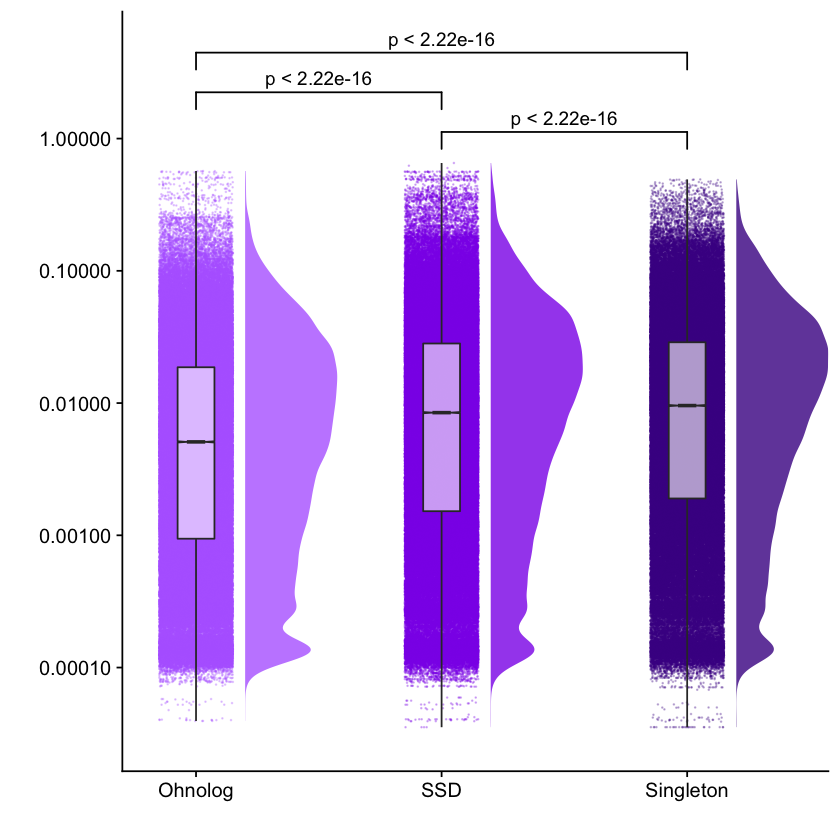

In [227]:
ohno_raincloud_metasoft <- ggplot(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero, aes(type2, propSignif)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = type2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = type2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma, limits=c(0.00003,5)) +
    scale_x_discrete(name="",
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    scale_fill_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    theme(legend.position="none") +
    geom_signif(y_position=c(0.65, 0.35, 0.05), comparisons = list(c("ohno", "singleton"), c("ohno", "SSD"), c("SSD", "singleton")),
               textsize=4, test = "wilcox.test")
ohno_raincloud_metasoft

##### Test difference in proportion of SNPs that are significant eQTLs

Ohnos vs SSDs

In [78]:
w <- wilcox.test(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero[ which(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type == 'ohno'),]$propSignif,
                propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero[ which(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type == 'SSD'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero[which(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type == "ohno"), ]$propSignif and propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero[which(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type == "SSD"), ]$propSignif
W = 1.5377e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [79]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

Ohnos vs singletons

In [80]:
w <- wilcox.test(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero[ which(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type == 'ohno'),]$propSignif,
                propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero[ which(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type == 'singleton'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero[which(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type == "ohno"), ]$propSignif and propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero[which(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type == "singleton"), ]$propSignif
W = 1.3911e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [81]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

SSDs vs singletons

In [82]:
w <- wilcox.test(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero[ which(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type == 'SSD'),]$propSignif,
                propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero[ which(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type == 'singleton'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero[which(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type == "SSD"), ]$propSignif and propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero[which(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type == "singleton"), ]$propSignif
W = 1.6253e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [83]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.953315e-43

In [84]:
tapply(propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$propSignif, propSNPsSignificanteQTLsOhnologsMetasoftWithoutZero$type, summary)

$ohno
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000394 0.0009427 0.0050865 0.0163075 0.0186522 0.5687500 

$singleton
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0018991 0.0095738 0.0235222 0.0288163 0.4912333 

$SSD
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0015218 0.0084643 0.0242903 0.0282113 0.6535151 


### CNVR genes (Zarrei et al)

#### Bonferroni-corrected eQTLs

In [96]:
propSNPsSignificanteQTLsCNVZarreiBonferroni <- read.csv(file="../../outputFiles/propSNPsSignificanteQTLsCNVZarreiBonferroni.csv", header=TRUE)

In [97]:
summary(propSNPsSignificanteQTLsCNVZarreiBonferroni)

 Ensembl.Gene.ID        CNV               field                SNPs      
 Length:790141      Length:790141      Length:790141      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6104  
 Mode  :character   Mode  :character   Mode  :character   Median : 7160  
                                                          Mean   : 7199  
                                                          3rd Qu.: 8125  
                                                          Max.   :28260  
     eQTLs           propSignif          tissue         
 Min.   :   0.00   Min.   :0.000000   Length:790141     
 1st Qu.:   0.00   1st Qu.:0.000000   Class :character  
 Median :   0.00   Median :0.000000   Mode  :character  
 Mean   :  17.65   Mean   :0.002585                     
 3rd Qu.:   0.00   3rd Qu.:0.000000                     
 Max.   :4540.00   Max.   :0.524256                     

In [100]:
propSNPsSignificanteQTLsCNVZarreiBonferroni$CNV2 <- factor(propSNPsSignificanteQTLsCNVZarreiBonferroni$CNV, levels = c('N', 'Y'))

In [101]:
propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero <- propSNPsSignificanteQTLsCNVZarreiBonferroni[ which(propSNPsSignificanteQTLsCNVZarreiBonferroni$propSignif > 0),]
summary(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero)

 Ensembl.Gene.ID        CNV               field                SNPs      
 Length:146224      Length:146224      Length:146224      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6235  
 Mode  :character   Mode  :character   Mode  :character   Median : 7289  
                                                          Mean   : 7396  
                                                          3rd Qu.: 8284  
                                                          Max.   :28243  
     eQTLs           propSignif           tissue          CNV2     
 Min.   :   1.00   Min.   :0.0000354   Length:146224      N:83908  
 1st Qu.:   8.00   1st Qu.:0.0011620   Class :character   Y:62316  
 Median :  38.00   Median :0.0052562   Mode  :character            
 Mean   :  95.36   Mean   :0.0139685                               
 3rd Qu.: 113.00   3rd Qu.:0.0161580                               
 Max.   :4540.00   Max.   :0.5242559                               

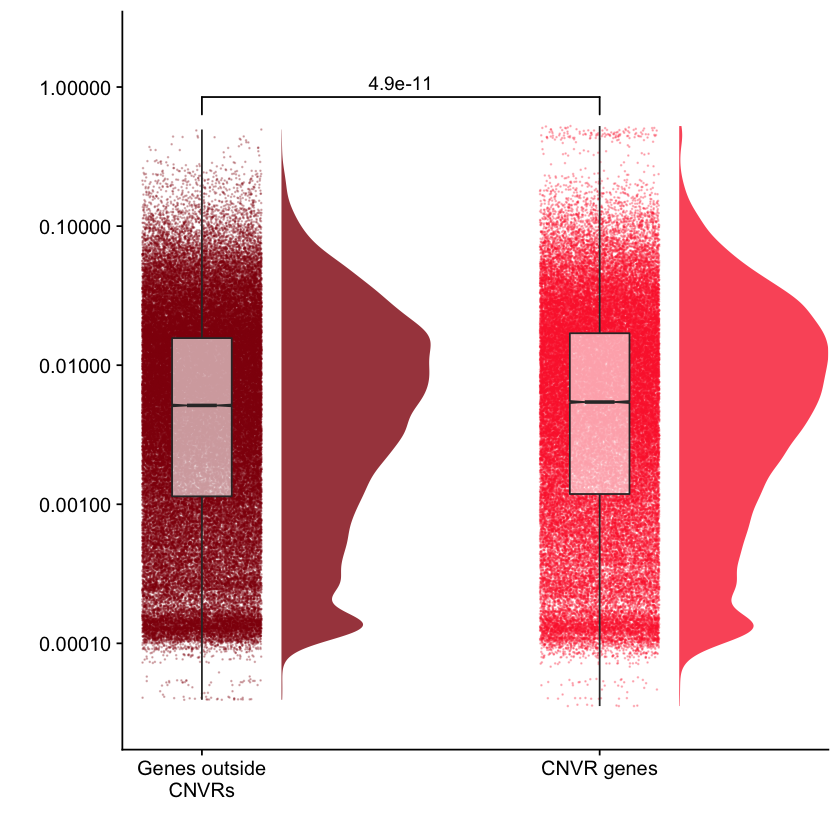

In [103]:
cnv_zarrei_raincloud_bonferroni <- ggplot(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero, aes(CNV2, propSignif)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CNV2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CNV2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma, limits=c(0.00003,2)) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
cnv_zarrei_raincloud_bonferroni

##### Test difference in number of SNPs

In [104]:
w <- wilcox.test(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero[ which(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero$CNV == 'Y'),]$SNPs,
                propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero[ which(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero$CNV == 'N'),]$SNPs) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero[which(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero$CNV == "Y"), ]$SNPs and propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero[which(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero$CNV == "N"), ]$SNPs
W = 2.994e+09, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [105]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

In [106]:
tapply(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero$SNPs, propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero$CNV, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    504    6098    7124    7171    8091   25643 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    119    6440    7530    7699    8652   28243 


##### Test difference in proportion of SNPs that are significant eQTLs

In [107]:
w <- wilcox.test(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero[ which(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero$CNV == 'Y'),]$propSignif,
                propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero[ which(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero$CNV == 'N'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero[which(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero$CNV == "Y"), ]$propSignif and propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero[which(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero$CNV == "N"), ]$propSignif
W = 2666888124, p-value = 4.866e-11
alternative hypothesis: true location shift is not equal to 0


In [108]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 6.812541e-10

In [109]:
tapply(propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero$propSignif, propSNPsSignificanteQTLsCNVZarreiBonferroniWithoutZero$CNV, summary)

$N
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000393 0.0011407 0.0051372 0.0132334 0.0156593 0.4949844 

$Y
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0011853 0.0054342 0.0149584 0.0169706 0.5242559 


##### Test difference in number of SNPs but include that have no eQTLs (proportion = 0)

In [112]:
w <- wilcox.test(propSNPsSignificanteQTLsCNVZarreiBonferroni[ which(propSNPsSignificanteQTLsCNVZarreiBonferroni$CNV == 'Y'),]$propSignif,
                propSNPsSignificanteQTLsCNVZarreiBonferroni[ which(propSNPsSignificanteQTLsCNVZarreiBonferroni$CNV == 'N'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsCNVZarreiBonferroni[which(propSNPsSignificanteQTLsCNVZarreiBonferroni$CNV == "Y"), ]$propSignif and propSNPsSignificanteQTLsCNVZarreiBonferroni[which(propSNPsSignificanteQTLsCNVZarreiBonferroni$CNV == "N"), ]$propSignif
W = 7.6186e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [113]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

In [114]:
tapply(propSNPsSignificanteQTLsCNVZarreiBonferroni$propSignif, propSNPsSignificanteQTLsCNVZarreiBonferroni$CNV, summary)

$N
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.002251 0.000000 0.494984 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.00314 0.00000 0.52426 


#### Metasoft eQTLs

In [115]:
propSNPsSignificanteQTLsCNVZarreiMetasoft <- read.csv(file="../../outputFiles/propSNPsSignificanteQTLsCNVZarreiMetasoft.csv", header=TRUE)

In [116]:
summary(propSNPsSignificanteQTLsCNVZarreiMetasoft)

 Ensembl.Gene.ID        CNV               field                SNPs      
 Length:790141      Length:790141      Length:790141      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6104  
 Mode  :character   Mode  :character   Mode  :character   Median : 7160  
                                                          Mean   : 7199  
                                                          3rd Qu.: 8125  
                                                          Max.   :28260  
     eQTLs          propSignif         tissue         
 Min.   :   0.0   Min.   :0.00000   Length:790141     
 1st Qu.:   0.0   1st Qu.:0.00000   Class :character  
 Median :  13.0   Median :0.00181   Mode  :character  
 Mean   : 102.4   Mean   :0.01492                     
 3rd Qu.: 107.0   3rd Qu.:0.01518                     
 Max.   :8955.0   Max.   :0.65352                     

In [117]:
propSNPsSignificanteQTLsCNVZarreiMetasoft$CNV2 <- factor(propSNPsSignificanteQTLsCNVZarreiMetasoft$CNV, levels = c('N', 'Y'))

In [118]:
propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero <- propSNPsSignificanteQTLsCNVZarreiMetasoft[ which(propSNPsSignificanteQTLsCNVZarreiMetasoft$propSignif > 0),]
summary(propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero)

 Ensembl.Gene.ID        CNV               field                SNPs      
 Length:552145      Length:552145      Length:552145      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6162  
 Mode  :character   Mode  :character   Mode  :character   Median : 7226  
                                                          Mean   : 7290  
                                                          3rd Qu.: 8191  
                                                          Max.   :28260  
     eQTLs          propSignif           tissue          CNV2      
 Min.   :   1.0   Min.   :0.0000354   Length:552145      N:334078  
 1st Qu.:  10.0   1st Qu.:0.0013569   Class :character   Y:218067  
 Median :  53.0   Median :0.0074195   Mode  :character             
 Mean   : 146.6   Mean   :0.0213488                                
 3rd Qu.: 174.0   3rd Qu.:0.0250884                                
 Max.   :8955.0   Max.   :0.6535151                                

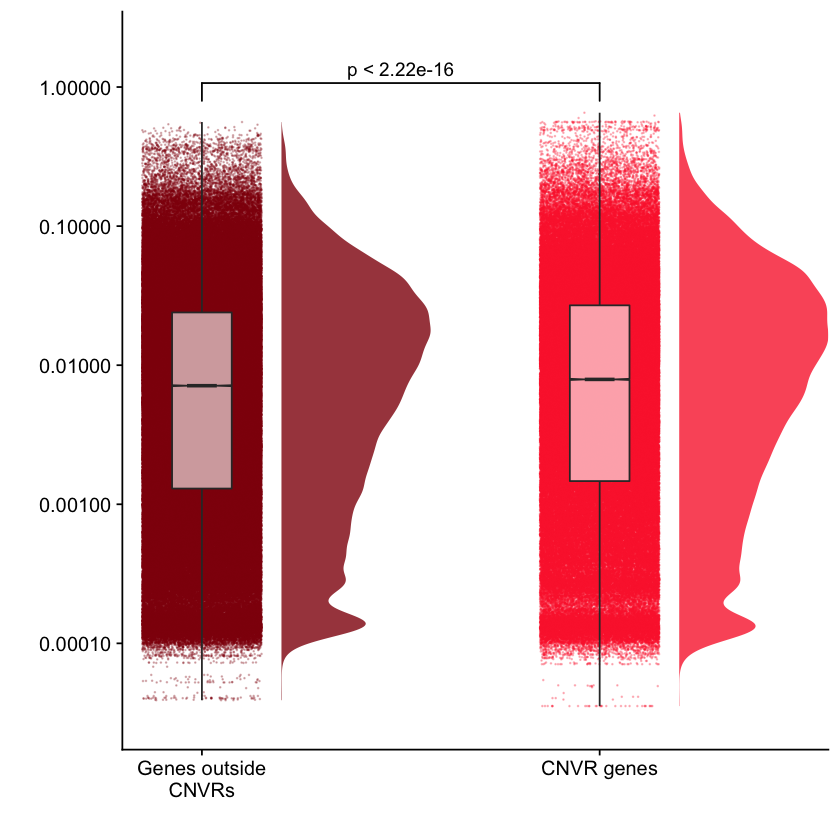

In [119]:
cnv_zarrei_raincloud_metasoft <- ggplot(propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero, aes(CNV2, propSignif)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CNV2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CNV2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma, limits=c(0.00003,2)) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
cnv_zarrei_raincloud_metasoft

##### Test difference in proportion of SNPs that are significant eQTLs

In [120]:
w <- wilcox.test(propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero[ which(propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero$CNV == 'Y'),]$propSignif,
                propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero[ which(propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero$CNV == 'N'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero[which(propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero$CNV == "Y"), ]$propSignif and propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero[which(propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero$CNV == "N"), ]$propSignif
W = 3.7604e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [121]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 5.277597e-91

In [122]:
tapply(propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero$propSignif, propSNPsSignificanteQTLsCNVZarreiMetasoftWithoutZero$CNV, summary)

$N
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000039 0.001297 0.007122 0.020105 0.023945 0.560144 

$Y
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0014682 0.0079035 0.0232535 0.0269365 0.6535151 


### CNV genes (ExAC data)

#### Bonferroni-corrected eQTLs

In [123]:
propSNPsSignificanteQTLsCNVExACBonferroni <- read.csv(file="../../outputFiles/propSNPsSignificanteQTLsCNVExACBonferroni.csv", header=TRUE)

In [124]:
summary(propSNPsSignificanteQTLsCNVExACBonferroni)

 Ensembl.Gene.ID        CNV               field                SNPs      
 Length:651494      Length:651494      Length:651494      Min.   : 1154  
 Class :character   Class :character   Class :character   1st Qu.: 6270  
 Mode  :character   Mode  :character   Mode  :character   Median : 7224  
                                                          Mean   : 7325  
                                                          3rd Qu.: 8125  
                                                          Max.   :28260  
     eQTLs           propSignif          tissue         
 Min.   :   0.00   Min.   :0.000000   Length:651494     
 1st Qu.:   0.00   1st Qu.:0.000000   Class :character  
 Median :   0.00   Median :0.000000   Mode  :character  
 Mean   :  15.83   Mean   :0.002309                     
 3rd Qu.:   0.00   3rd Qu.:0.000000                     
 Max.   :3610.00   Max.   :0.524256                     

In [125]:
propSNPsSignificanteQTLsCNVExACBonferroni$CNV2 <- factor(propSNPsSignificanteQTLsCNVExACBonferroni$CNV, levels = c('N', 'Y'))

In [126]:
propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero <- propSNPsSignificanteQTLsCNVExACBonferroni[ which(propSNPsSignificanteQTLsCNVExACBonferroni$propSignif > 0),]
summary(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero)

 Ensembl.Gene.ID        CNV               field                SNPs      
 Length:116736      Length:116736      Length:116736      Min.   : 1338  
 Class :character   Class :character   Class :character   1st Qu.: 6386  
 Mode  :character   Mode  :character   Mode  :character   Median : 7350  
                                                          Mean   : 7496  
                                                          3rd Qu.: 8275  
                                                          Max.   :28243  
     eQTLs           propSignif           tissue          CNV2      
 Min.   :   1.00   Min.   :0.0000354   Length:116736      N: 10602  
 1st Qu.:   8.00   1st Qu.:0.0011441   Class :character   Y:106134  
 Median :  38.00   Median :0.0051718   Mode  :character             
 Mean   :  88.35   Mean   :0.0128851                                
 3rd Qu.: 111.00   3rd Qu.:0.0155306                                
 Max.   :3610.00   Max.   :0.5242559                                

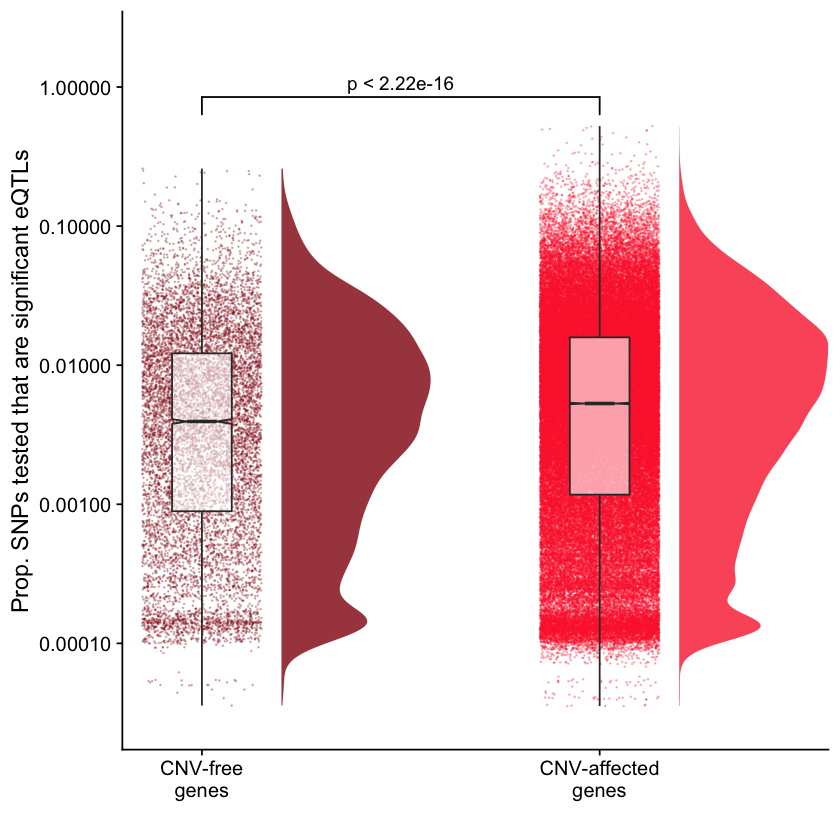

In [197]:
cnv_exac_raincloud_bonferroni <- ggplot(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero, aes(CNV2, propSignif)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CNV2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CNV2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="Prop. SNPs tested that are significant eQTLs", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma, limits=c(0.00003,2)) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
cnv_exac_raincloud_bonferroni

##### Test difference in number of SNPs

In [128]:
w <- wilcox.test(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero[ which(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero$CNV == 'Y'),]$SNPs,
                propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero[ which(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero$CNV == 'N'),]$SNPs) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero[which(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero$CNV == "Y"), ]$SNPs and propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero[which(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero$CNV == "N"), ]$SNPs
W = 619077851, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [129]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 3.756326e-64

In [130]:
tapply(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero$SNPs, propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero$CNV, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3234    6245    7111    7379    7903   28011 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1338    6398    7378    7508    8316   28243 


##### Test difference in proportion of SNPs that are significant eQTLs

In [131]:
w <- wilcox.test(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero[ which(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero$CNV == 'Y'),]$propSignif,
                propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero[ which(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero$CNV == 'N'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero[which(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero$CNV == "Y"), ]$propSignif and propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero[which(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero$CNV == "N"), ]$propSignif
W = 608048216, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [132]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 9.174293e-42

In [133]:
tapply(propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero$propSignif, propSNPsSignificanteQTLsCNVExACBonferroniWithoutZero$CNV, summary)

$N
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000357 0.0008910 0.0039365 0.0104207 0.0121669 0.2593603 

$Y
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0011733 0.0053032 0.0131312 0.0158522 0.5242559 


##### Test difference in number of SNPs but include that have no eQTLs (proportion = 0)

In [134]:
w <- wilcox.test(propSNPsSignificanteQTLsCNVExACBonferroni[ which(propSNPsSignificanteQTLsCNVExACBonferroni$CNV == 'Y'),]$propSignif,
                propSNPsSignificanteQTLsCNVExACBonferroni[ which(propSNPsSignificanteQTLsCNVExACBonferroni$CNV == 'N'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsCNVExACBonferroni[which(propSNPsSignificanteQTLsCNVExACBonferroni$CNV == "Y"), ]$propSignif and propSNPsSignificanteQTLsCNVExACBonferroni[which(propSNPsSignificanteQTLsCNVExACBonferroni$CNV == "N"), ]$propSignif
W = 2.3257e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [135]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 7.972359e-244

In [136]:
tapply(propSNPsSignificanteQTLsCNVExACBonferroni$propSignif, propSNPsSignificanteQTLsCNVExACBonferroni$CNV, summary)

$N
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.001432 0.000000 0.259360 

$Y
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.002427 0.000000 0.524256 


#### Metasoft eQTLs

In [137]:
propSNPsSignificanteQTLsCNVExACMetasoft <- read.csv(file="../../outputFiles/propSNPsSignificanteQTLsCNVExACMetasoft.csv", header=TRUE)

In [138]:
summary(propSNPsSignificanteQTLsCNVExACMetasoft)

 Ensembl.Gene.ID        CNV               field                SNPs      
 Length:651494      Length:651494      Length:651494      Min.   : 1154  
 Class :character   Class :character   Class :character   1st Qu.: 6270  
 Mode  :character   Mode  :character   Mode  :character   Median : 7224  
                                                          Mean   : 7325  
                                                          3rd Qu.: 8125  
                                                          Max.   :28260  
     eQTLs           propSignif          tissue         
 Min.   :   0.00   Min.   :0.000000   Length:651494     
 1st Qu.:   0.00   1st Qu.:0.000000   Class :character  
 Median :  12.00   Median :0.001724   Mode  :character  
 Mean   :  95.65   Mean   :0.013803                     
 3rd Qu.: 104.00   3rd Qu.:0.014501                     
 Max.   :8955.00   Max.   :0.653515                     

In [139]:
propSNPsSignificanteQTLsCNVExACMetasoft$CNV2 <- factor(propSNPsSignificanteQTLsCNVExACMetasoft$CNV, levels = c('N', 'Y'))

In [140]:
propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero <- propSNPsSignificanteQTLsCNVExACMetasoft[ which(propSNPsSignificanteQTLsCNVExACMetasoft$propSignif > 0),]
summary(propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero)

 Ensembl.Gene.ID        CNV               field                SNPs      
 Length:454589      Length:454589      Length:454589      Min.   : 1338  
 Class :character   Class :character   Class :character   1st Qu.: 6315  
 Mode  :character   Mode  :character   Mode  :character   Median : 7278  
                                                          Mean   : 7401  
                                                          3rd Qu.: 8184  
                                                          Max.   :28260  
     eQTLs          propSignif           tissue          CNV2      
 Min.   :   1.0   Min.   :0.0000354   Length:454589      N: 48027  
 1st Qu.:   9.0   1st Qu.:0.0013019   Class :character   Y:406562  
 Median :  53.0   Median :0.0071679   Mode  :character             
 Mean   : 137.1   Mean   :0.0197824                                
 3rd Qu.: 171.0   3rd Qu.:0.0238951                                
 Max.   :8955.0   Max.   :0.6535151                                

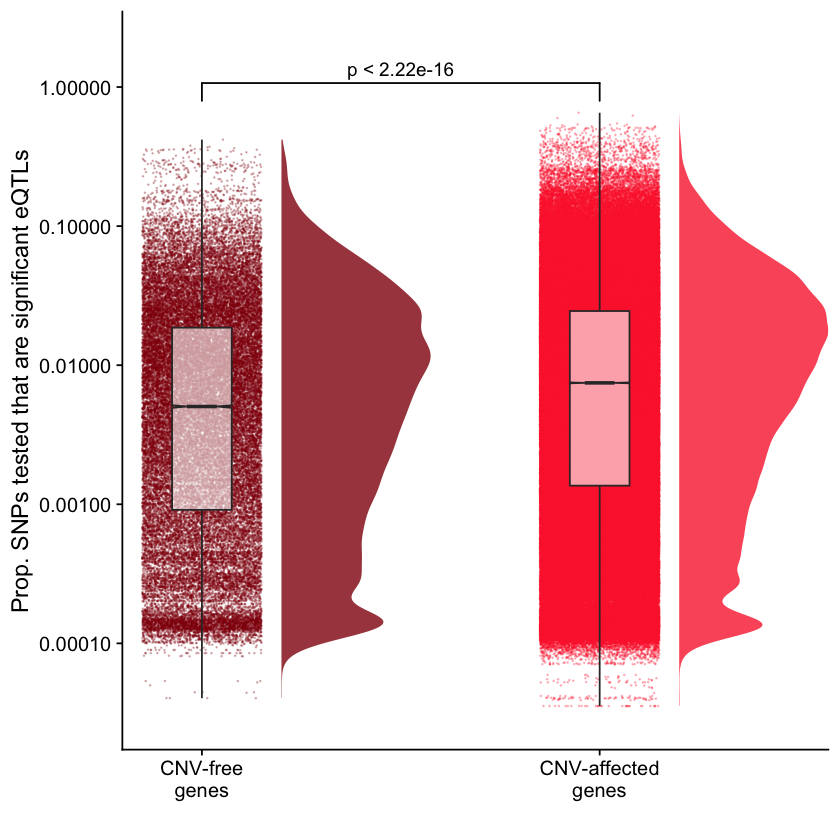

In [208]:
cnv_exac_raincloud_metasoft <- ggplot(propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero, aes(CNV2, propSignif)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CNV2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CNV2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="Prop. SNPs tested that are significant eQTLs", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma, limits=c(0.00003,2)) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
cnv_exac_raincloud_metasoft

##### Test difference in proportion of SNPs that are significant eQTLs

In [142]:
w <- wilcox.test(propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero[ which(propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero$CNV == 'Y'),]$propSignif,
                propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero[ which(propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero$CNV == 'N'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero[which(propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero$CNV == "Y"), ]$propSignif and propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero[which(propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero$CNV == "N"), ]$propSignif
W = 1.0692e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [143]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.479856e-254

In [144]:
tapply(propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero$propSignif, propSNPsSignificanteQTLsCNVExACMetasoftWithoutZero$CNV, summary)

$N
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000403 0.0009122 0.0050460 0.0159068 0.0186213 0.4189149 

$Y
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0013615 0.0074627 0.0202402 0.0245119 0.6535151 


### Haploinsufficient genes

#### Bonferroni-corrected eQTLs

In [147]:
propSNPsSignificanteQTLsHaploBonferroni <- read.csv(file="../../outputFiles/propSNPsSignificanteQTLsHaploBonferroni.csv", header=TRUE)

In [148]:
summary(propSNPsSignificanteQTLsHaploBonferroni)

 Ensembl.Gene.ID       haplo              field                SNPs      
 Length:724409      Length:724409      Length:724409      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6256  
 Mode  :character   Mode  :character   Mode  :character   Median : 7228  
                                                          Mean   : 7334  
                                                          3rd Qu.: 8149  
                                                          Max.   :28260  
     eQTLs           propSignif         tissue         
 Min.   :   0.00   Min.   :0.00000   Length:724409     
 1st Qu.:   0.00   1st Qu.:0.00000   Class :character  
 Median :   0.00   Median :0.00000   Mode  :character  
 Mean   :  17.52   Mean   :0.00249                     
 3rd Qu.:   0.00   3rd Qu.:0.00000                     
 Max.   :4540.00   Max.   :0.52426                     

In [149]:
propSNPsSignificanteQTLsHaploBonferroniWithoutZero <- propSNPsSignificanteQTLsHaploBonferroni[ which(propSNPsSignificanteQTLsHaploBonferroni$propSignif > 0),]
summary(propSNPsSignificanteQTLsHaploBonferroniWithoutZero)

 Ensembl.Gene.ID       haplo              field                SNPs      
 Length:134333      Length:134333      Length:134333      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6354  
 Mode  :character   Mode  :character   Mode  :character   Median : 7353  
                                                          Mean   : 7522  
                                                          3rd Qu.: 8316  
                                                          Max.   :28243  
     eQTLs           propSignif           tissue         
 Min.   :   1.00   Min.   :0.0000354   Length:134333     
 1st Qu.:   9.00   1st Qu.:0.0011638   Class :character  
 Median :  39.00   Median :0.0052466   Mode  :character  
 Mean   :  94.51   Mean   :0.0134263                     
 3rd Qu.: 114.00   3rd Qu.:0.0159269                     
 Max.   :4540.00   Max.   :0.5242559                     

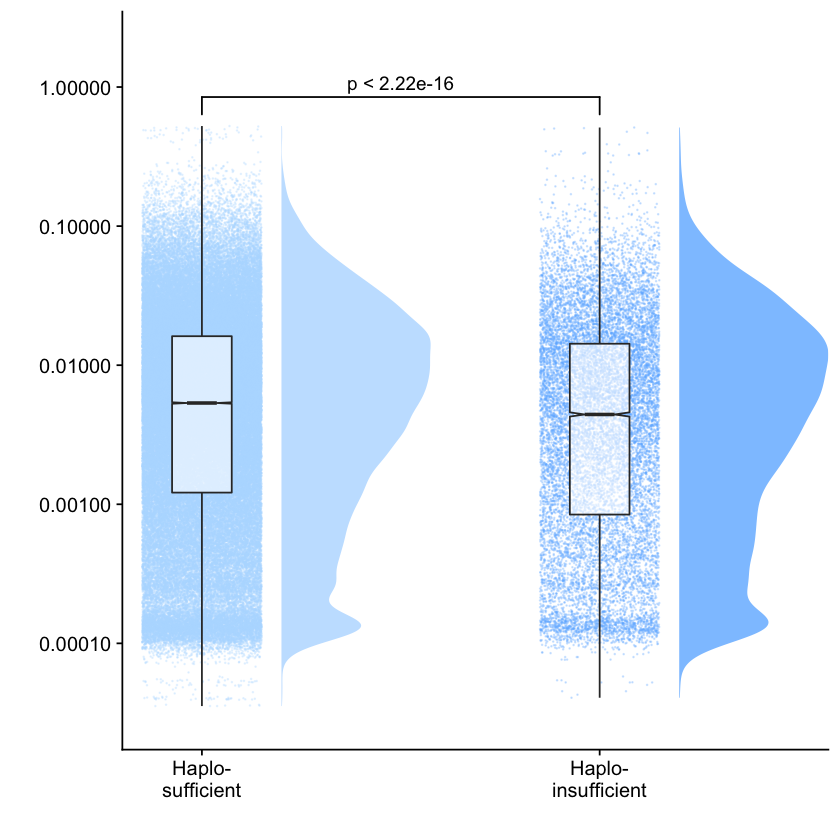

In [215]:
haplo_raincloud_bonferroni <- ggplot(propSNPsSignificanteQTLsHaploBonferroniWithoutZero, aes(haplo, propSignif)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = haplo), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = haplo), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma, limits=c(0.00003,2)) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        limits=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient")) +
    scale_fill_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        limits=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
haplo_raincloud_bonferroni

##### Test difference in number of SNPs

In [152]:
w <- wilcox.test(propSNPsSignificanteQTLsHaploBonferroniWithoutZero[ which(propSNPsSignificanteQTLsHaploBonferroniWithoutZero$haplo == 'Y'),]$SNPs,
                propSNPsSignificanteQTLsHaploBonferroniWithoutZero[ which(propSNPsSignificanteQTLsHaploBonferroniWithoutZero$haplo == 'N'),]$SNPs) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsHaploBonferroniWithoutZero[which(propSNPsSignificanteQTLsHaploBonferroniWithoutZero$haplo == "Y"), ]$SNPs and propSNPsSignificanteQTLsHaploBonferroniWithoutZero[which(propSNPsSignificanteQTLsHaploBonferroniWithoutZero$haplo == "N"), ]$SNPs
W = 902210098, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [153]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 9.873128e-35

In [155]:
tapply(propSNPsSignificanteQTLsHaploBonferroniWithoutZero$SNPs, propSNPsSignificanteQTLsHaploBonferroniWithoutZero$haplo, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    119    6363    7365    7553    8359   28243 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1621    6297    7229    7294    8103   25335 


##### Test difference in proportion of SNPs that are significant eQTLs

In [156]:
w <- wilcox.test(propSNPsSignificanteQTLsHaploBonferroniWithoutZero[ which(propSNPsSignificanteQTLsHaploBonferroniWithoutZero$haplo == 'Y'),]$propSignif,
                propSNPsSignificanteQTLsHaploBonferroniWithoutZero[ which(propSNPsSignificanteQTLsHaploBonferroniWithoutZero$haplo == 'N'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsHaploBonferroniWithoutZero[which(propSNPsSignificanteQTLsHaploBonferroniWithoutZero$haplo == "Y"), ]$propSignif and propSNPsSignificanteQTLsHaploBonferroniWithoutZero[which(propSNPsSignificanteQTLsHaploBonferroniWithoutZero$haplo == "N"), ]$propSignif
W = 903980822, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [157]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.12222e-32

In [158]:
tapply(propSNPsSignificanteQTLsHaploBonferroniWithoutZero$propSignif, propSNPsSignificanteQTLsHaploBonferroniWithoutZero$haplo, summary)

$N
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0012134 0.0053472 0.0136010 0.0161591 0.5242559 

$Y
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000406 0.0008436 0.0044228 0.0121576 0.0142692 0.5116776 


##### Test difference in number of SNPs but include that have no eQTLs (proportion = 0)

In [159]:
w <- wilcox.test(propSNPsSignificanteQTLsHaploBonferroni[ which(propSNPsSignificanteQTLsHaploBonferroni$haplo == 'Y'),]$propSignif,
                propSNPsSignificanteQTLsHaploBonferroni[ which(propSNPsSignificanteQTLsHaploBonferroni$haplo == 'N'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsHaploBonferroni[which(propSNPsSignificanteQTLsHaploBonferroni$haplo == "Y"), ]$propSignif and propSNPsSignificanteQTLsHaploBonferroni[which(propSNPsSignificanteQTLsHaploBonferroni$haplo == "N"), ]$propSignif
W = 3.7294e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [160]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

In [161]:
tapply(propSNPsSignificanteQTLsHaploBonferroni$propSignif, propSNPsSignificanteQTLsHaploBonferroni$haplo, summary)

$N
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.002746 0.000000 0.524256 

$Y
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.001416 0.000000 0.511678 


#### Metasoft eQTLs

In [162]:
propSNPsSignificanteQTLsHaploMetasoft <- read.csv(file="../../outputFiles/propSNPsSignificanteQTLsHaploMetasoft.csv", header=TRUE)

In [163]:
summary(propSNPsSignificanteQTLsHaploMetasoft)

 Ensembl.Gene.ID       haplo              field                SNPs      
 Length:724409      Length:724409      Length:724409      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6256  
 Mode  :character   Mode  :character   Mode  :character   Median : 7228  
                                                          Mean   : 7334  
                                                          3rd Qu.: 8149  
                                                          Max.   :28260  
     eQTLs        propSignif          tissue         
 Min.   :   0   Min.   :0.000000   Length:724409     
 1st Qu.:   0   1st Qu.:0.000000   Class :character  
 Median :  14   Median :0.001882   Mode  :character  
 Mean   : 103   Mean   :0.014600                     
 3rd Qu.: 109   3rd Qu.:0.015187                     
 Max.   :8955   Max.   :0.653515                     

In [164]:
propSNPsSignificanteQTLsHaploMetasoftWithoutZero <- propSNPsSignificanteQTLsHaploMetasoft[ which(propSNPsSignificanteQTLsHaploMetasoft$propSignif > 0),]
summary(propSNPsSignificanteQTLsHaploMetasoftWithoutZero)

 Ensembl.Gene.ID       haplo              field                SNPs      
 Length:510090      Length:510090      Length:510090      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6300  
 Mode  :character   Mode  :character   Mode  :character   Median : 7283  
                                                          Mean   : 7413  
                                                          3rd Qu.: 8216  
                                                          Max.   :28260  
     eQTLs          propSignif           tissue         
 Min.   :   1.0   Min.   :0.0000354   Length:510090     
 1st Qu.:  10.0   1st Qu.:0.0013474   Class :character  
 Median :  54.0   Median :0.0073873   Mode  :character  
 Mean   : 146.3   Mean   :0.0207345                     
 3rd Qu.: 176.0   3rd Qu.:0.0246776                     
 Max.   :8955.0   Max.   :0.6535151                     

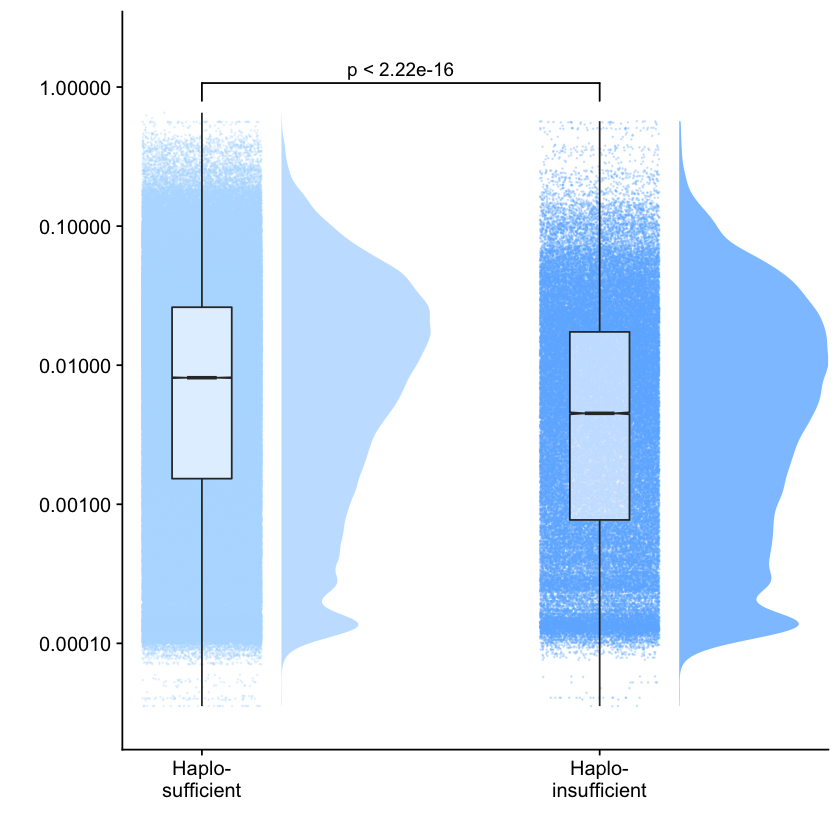

In [207]:
haplo_raincloud_metasoft <- ggplot(propSNPsSignificanteQTLsHaploMetasoftWithoutZero, aes(haplo, propSignif)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = haplo), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = haplo), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma, limits=c(0.00003,2)) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        limits=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient")) +
    scale_fill_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        limits=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
haplo_raincloud_metasoft

##### Test difference in proportion of SNPs that are significant eQTLs

In [166]:
w <- wilcox.test(propSNPsSignificanteQTLsHaploMetasoftWithoutZero[ which(propSNPsSignificanteQTLsHaploMetasoftWithoutZero$haplo == 'Y'),]$propSignif,
                propSNPsSignificanteQTLsHaploMetasoftWithoutZero[ which(propSNPsSignificanteQTLsHaploMetasoftWithoutZero$haplo == 'N'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsHaploMetasoftWithoutZero[which(propSNPsSignificanteQTLsHaploMetasoftWithoutZero$haplo == "Y"), ]$propSignif and propSNPsSignificanteQTLsHaploMetasoftWithoutZero[which(propSNPsSignificanteQTLsHaploMetasoftWithoutZero$haplo == "N"), ]$propSignif
W = 1.5474e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [167]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

In [169]:
tapply(propSNPsSignificanteQTLsHaploMetasoftWithoutZero$propSignif, propSNPsSignificanteQTLsHaploMetasoftWithoutZero$haplo, summary)

$N
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0015285 0.0081281 0.0217333 0.0261118 0.6535151 

$Y
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0007717 0.0045070 0.0157463 0.0173555 0.5687500 


### Conserved copy number genes

#### Bonferroni-corrected eQTLs

In [170]:
propSNPsSignificanteQTLsCCNBonferroni <- read.csv(file="../../outputFiles/propSNPsSignificanteQTLsCCNBonferroni.csv", header=TRUE)

In [171]:
summary(propSNPsSignificanteQTLsCCNBonferroni)

 Ensembl.Gene.ID        CCN               field                SNPs      
 Length:774180      Length:774180      Length:774180      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6107  
 Mode  :character   Mode  :character   Mode  :character   Median : 7156  
                                                          Mean   : 7198  
                                                          3rd Qu.: 8118  
                                                          Max.   :28260  
     eQTLs           propSignif         tissue         
 Min.   :   0.00   Min.   :0.00000   Length:774180     
 1st Qu.:   0.00   1st Qu.:0.00000   Class :character  
 Median :   0.00   Median :0.00000   Mode  :character  
 Mean   :  17.56   Mean   :0.00257                     
 3rd Qu.:   0.00   3rd Qu.:0.00000                     
 Max.   :4540.00   Max.   :0.52426                     

In [172]:
propSNPsSignificanteQTLsCCNBonferroniWithoutZero <- propSNPsSignificanteQTLsCCNBonferroni[ which(propSNPsSignificanteQTLsCCNBonferroni$propSignif > 0),]
summary(propSNPsSignificanteQTLsCCNBonferroniWithoutZero)

 Ensembl.Gene.ID        CCN               field                SNPs      
 Length:142671      Length:142671      Length:142671      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6243  
 Mode  :character   Mode  :character   Mode  :character   Median : 7286  
                                                          Mean   : 7402  
                                                          3rd Qu.: 8275  
                                                          Max.   :28243  
     eQTLs          propSignif           tissue         
 Min.   :   1.0   Min.   :0.0000354   Length:142671     
 1st Qu.:   8.0   1st Qu.:0.0011618   Class :character  
 Median :  38.0   Median :0.0052356   Mode  :character  
 Mean   :  95.3   Mean   :0.0139470                     
 3rd Qu.: 113.0   3rd Qu.:0.0161244                     
 Max.   :4540.0   Max.   :0.5242559                     

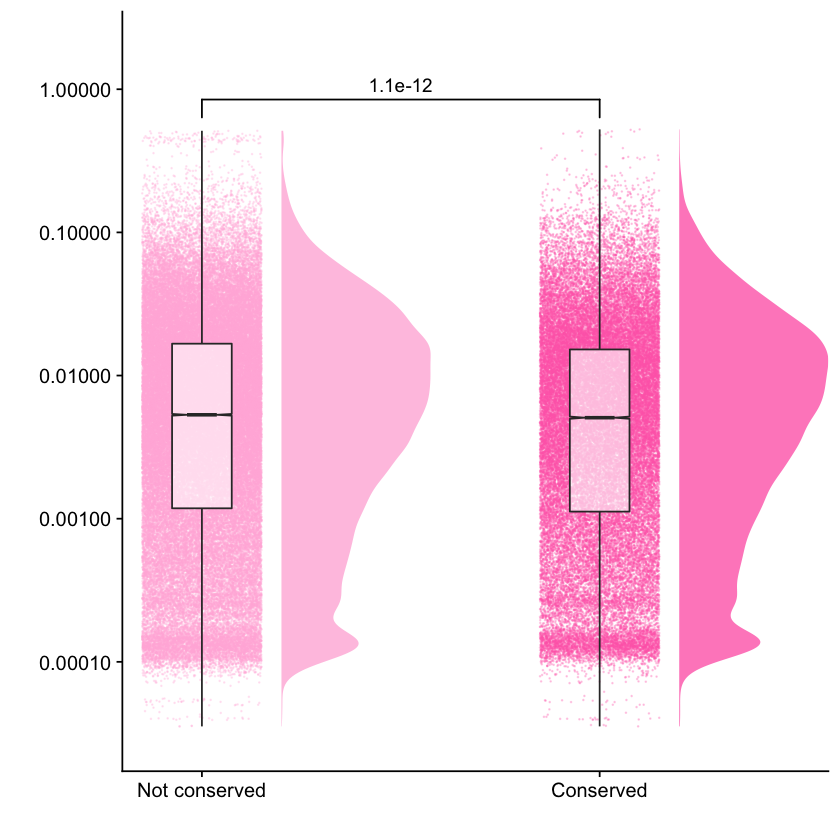

In [173]:
ccn_raincloud_bonferroni <- ggplot(propSNPsSignificanteQTLsCCNBonferroniWithoutZero, aes(CCN, propSignif)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CCN), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CCN), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma, limits=c(0.00003,2)) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Not conserved", "Conserved"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        limits=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    scale_fill_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        limits=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
ccn_raincloud_bonferroni

##### Test difference in number of SNPs

In [174]:
w <- wilcox.test(propSNPsSignificanteQTLsCCNBonferroniWithoutZero[ which(propSNPsSignificanteQTLsCCNBonferroniWithoutZero$CCN == 'Y'),]$SNPs,
                propSNPsSignificanteQTLsCCNBonferroniWithoutZero[ which(propSNPsSignificanteQTLsCCNBonferroniWithoutZero$CCN == 'N'),]$SNPs) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsCCNBonferroniWithoutZero[which(propSNPsSignificanteQTLsCCNBonferroniWithoutZero$CCN == "Y"), ]$SNPs and propSNPsSignificanteQTLsCCNBonferroniWithoutZero[which(propSNPsSignificanteQTLsCCNBonferroniWithoutZero$CCN == "N"), ]$SNPs
W = 2322165336, p-value = 7.407e-08
alternative hypothesis: true location shift is not equal to 0


In [175]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.037019e-06

In [176]:
tapply(propSNPsSignificanteQTLsCCNBonferroniWithoutZero$SNPs, propSNPsSignificanteQTLsCCNBonferroniWithoutZero$CCN, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    119    6184    7300    7427    8364   28243 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1408    6314    7257    7358    8164   28238 


##### Test difference in proportion of SNPs that are significant eQTLs

In [177]:
w <- wilcox.test(propSNPsSignificanteQTLsCCNBonferroniWithoutZero[ which(propSNPsSignificanteQTLsCCNBonferroniWithoutZero$CCN == 'Y'),]$propSignif,
                propSNPsSignificanteQTLsCCNBonferroniWithoutZero[ which(propSNPsSignificanteQTLsCCNBonferroniWithoutZero$CCN == 'N'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsCCNBonferroniWithoutZero[which(propSNPsSignificanteQTLsCCNBonferroniWithoutZero$CCN == "Y"), ]$propSignif and propSNPsSignificanteQTLsCCNBonferroniWithoutZero[which(propSNPsSignificanteQTLsCCNBonferroniWithoutZero$CCN == "N"), ]$propSignif
W = 2309147232, p-value = 1.096e-12
alternative hypothesis: true location shift is not equal to 0


In [178]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.534453e-11

In [179]:
tapply(propSNPsSignificanteQTLsCCNBonferroniWithoutZero$propSignif, propSNPsSignificanteQTLsCCNBonferroniWithoutZero$CCN, summary)

$N
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0011819 0.0053185 0.0145326 0.0166954 0.5127625 

$Y
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0011210 0.0050769 0.0129341 0.0152139 0.5242559 


##### Test difference in number of SNPs but include that have no eQTLs (proportion = 0)

In [180]:
w <- wilcox.test(propSNPsSignificanteQTLsCCNBonferroni[ which(propSNPsSignificanteQTLsCCNBonferroni$CCN == 'Y'),]$propSignif,
                propSNPsSignificanteQTLsCCNBonferroni[ which(propSNPsSignificanteQTLsCCNBonferroni$CCN == 'N'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsCCNBonferroni[which(propSNPsSignificanteQTLsCCNBonferroni$CCN == "Y"), ]$propSignif and propSNPsSignificanteQTLsCCNBonferroni[which(propSNPsSignificanteQTLsCCNBonferroni$CCN == "N"), ]$propSignif
W = 6.9974e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [181]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 2.065037e-134

In [182]:
tapply(propSNPsSignificanteQTLsCCNBonferroni$propSignif, propSNPsSignificanteQTLsCCNBonferroni$CCN, summary)

$N
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.002803 0.000000 0.512763 

$Y
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.002213 0.000000 0.524256 


#### Metasoft eQTLs

In [183]:
propSNPsSignificanteQTLsCCNMetasoft <- read.csv(file="../../outputFiles/propSNPsSignificanteQTLsCCNMetasoft.csv", header=TRUE)

In [184]:
summary(propSNPsSignificanteQTLsCCNMetasoft)

 Ensembl.Gene.ID        CCN               field                SNPs      
 Length:774180      Length:774180      Length:774180      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6107  
 Mode  :character   Mode  :character   Mode  :character   Median : 7156  
                                                          Mean   : 7198  
                                                          3rd Qu.: 8118  
                                                          Max.   :28260  
     eQTLs          propSignif         tissue         
 Min.   :   0.0   Min.   :0.00000   Length:774180     
 1st Qu.:   0.0   1st Qu.:0.00000   Class :character  
 Median :  13.0   Median :0.00180   Mode  :character  
 Mean   : 101.9   Mean   :0.01479                     
 3rd Qu.: 106.0   3rd Qu.:0.01509                     
 Max.   :8955.0   Max.   :0.65352                     

In [185]:
propSNPsSignificanteQTLsCCNMetasoftWithoutZero <- propSNPsSignificanteQTLsCCNMetasoft[ which(propSNPsSignificanteQTLsCCNMetasoft$propSignif > 0),]
summary(propSNPsSignificanteQTLsCCNMetasoftWithoutZero)

 Ensembl.Gene.ID        CCN               field                SNPs      
 Length:541209      Length:541209      Length:541209      Min.   :  119  
 Class :character   Class :character   Class :character   1st Qu.: 6164  
 Mode  :character   Mode  :character   Mode  :character   Median : 7223  
                                                          Mean   : 7291  
                                                          3rd Qu.: 8185  
                                                          Max.   :28260  
     eQTLs          propSignif           tissue         
 Min.   :   1.0   Min.   :0.0000354   Length:541209     
 1st Qu.:   9.0   1st Qu.:0.0013457   Class :character  
 Median :  53.0   Median :0.0073762   Mode  :character  
 Mean   : 145.8   Mean   :0.0211594                     
 3rd Qu.: 173.0   3rd Qu.:0.0248697                     
 Max.   :8955.0   Max.   :0.6535151                     

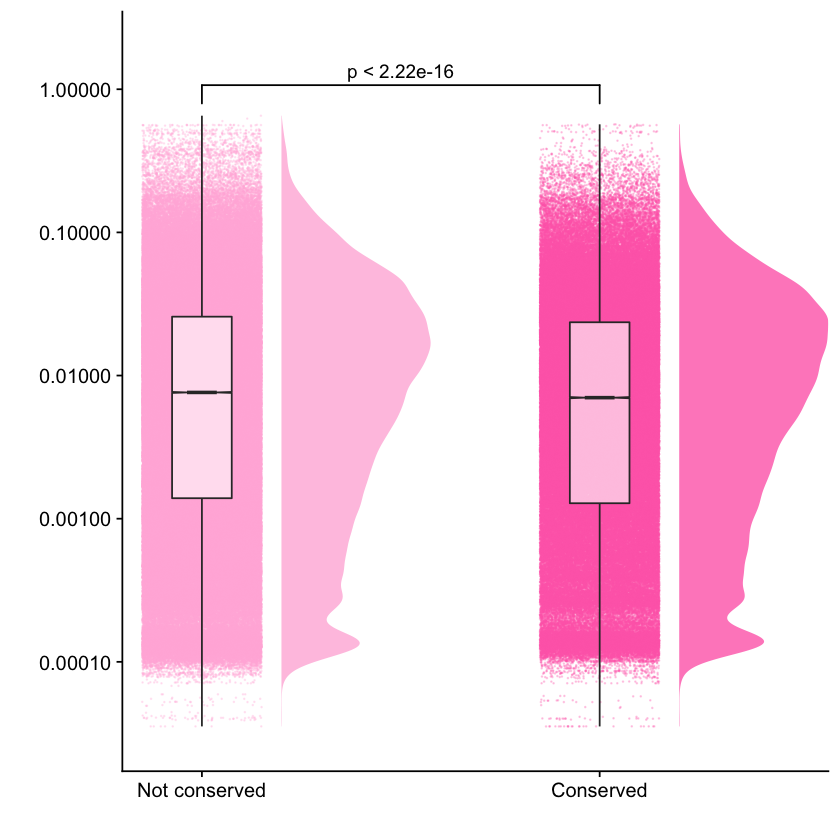

In [186]:
ccn_raincloud_metasoft <- ggplot(propSNPsSignificanteQTLsCCNMetasoftWithoutZero, aes(CCN, propSignif)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CCN), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CCN), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma, limits=c(0.00003,2)) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Not conserved", "Conserved"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        limits=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    scale_fill_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        limits=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
ccn_raincloud_metasoft

##### Test difference in proportion of SNPs that are significant eQTLs

In [187]:
w <- wilcox.test(propSNPsSignificanteQTLsCCNMetasoftWithoutZero[ which(propSNPsSignificanteQTLsCCNMetasoftWithoutZero$CCN == 'Y'),]$propSignif,
                propSNPsSignificanteQTLsCCNMetasoftWithoutZero[ which(propSNPsSignificanteQTLsCCNMetasoftWithoutZero$CCN == 'N'),]$propSignif) 
w


	Wilcoxon rank sum test with continuity correction

data:  propSNPsSignificanteQTLsCCNMetasoftWithoutZero[which(propSNPsSignificanteQTLsCCNMetasoftWithoutZero$CCN == "Y"), ]$propSignif and propSNPsSignificanteQTLsCCNMetasoftWithoutZero[which(propSNPsSignificanteQTLsCCNMetasoftWithoutZero$CCN == "N"), ]$propSignif
W = 3.3839e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [188]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.027432e-60

In [189]:
tapply(propSNPsSignificanteQTLsCCNMetasoftWithoutZero$propSignif, propSNPsSignificanteQTLsCCNMetasoftWithoutZero$CCN, summary)

$N
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0013902 0.0076207 0.0222672 0.0257800 0.6535151 

$Y
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000354 0.0012823 0.0070072 0.0194103 0.0235605 0.5687500 


## Plot figures

In [228]:
p <- (cnv_exac_raincloud_bonferroni + cnv_zarrei_raincloud_bonferroni + ohno_raincloud_bonferroni + haplo_raincloud_bonferroni + ccn_raincloud_bonferroni) + plot_layout(ncol = 5, nrow=1)

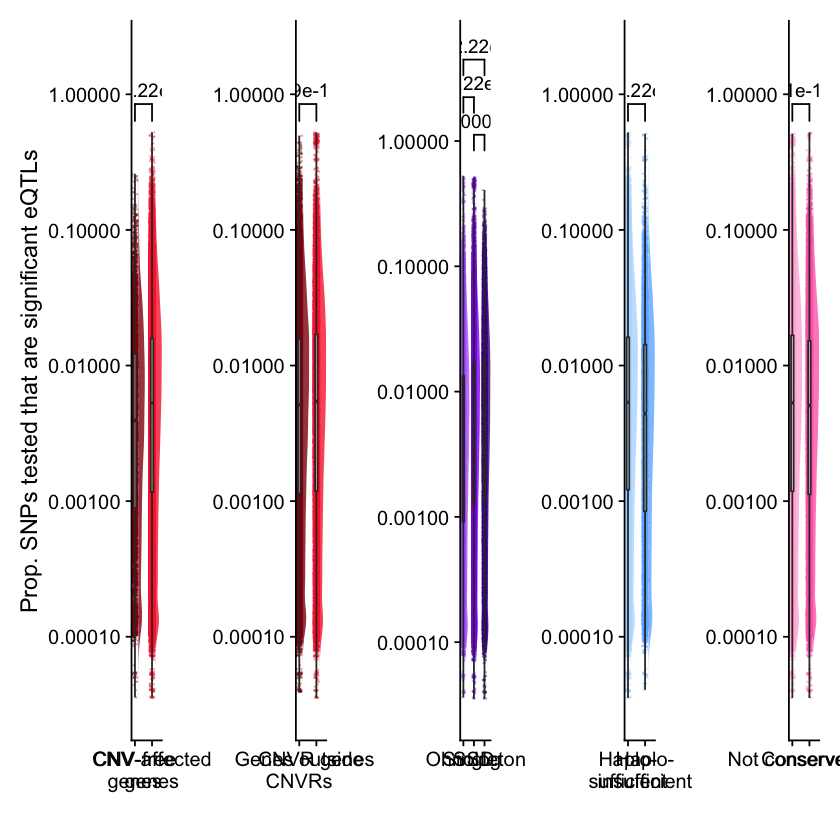

In [229]:
p

In [230]:
ggsave('../../outputFiles/figures/propSNPsSignificanteQTLsBonferroni.png', width=40, height=14, units="cm", dpi=300)

In [231]:
p_metasoft <- (cnv_exac_raincloud_metasoft + cnv_zarrei_raincloud_metasoft + ohno_raincloud_metasoft + haplo_raincloud_metasoft + ccn_raincloud_metasoft) + plot_layout(ncol = 5, nrow=1)

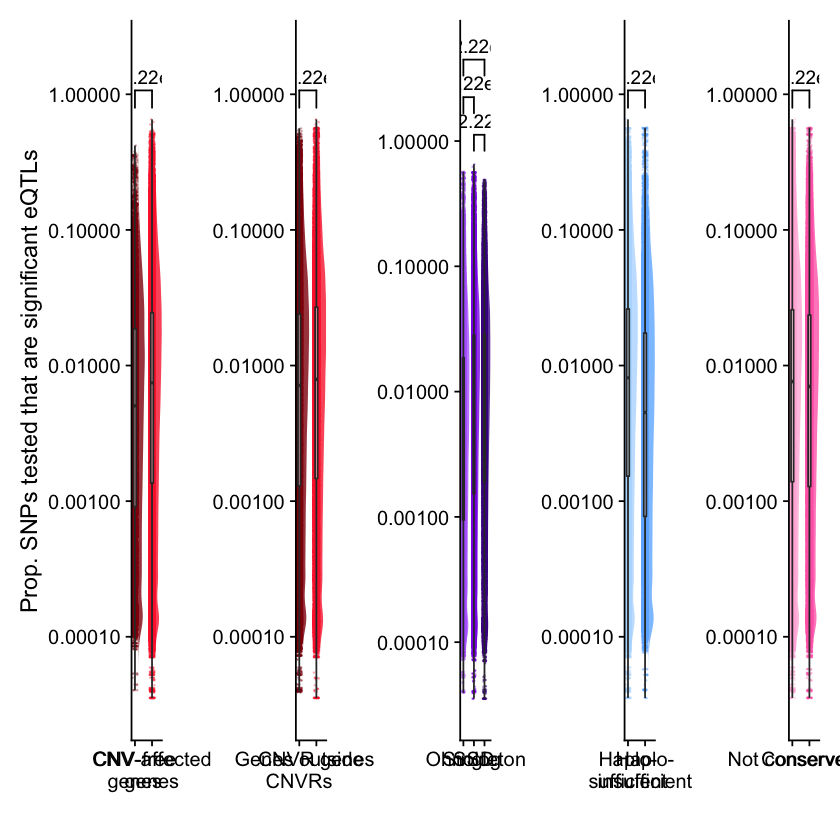

In [232]:
p_metasoft

In [233]:
ggsave('../../outputFiles/figures/propSNPsSignificanteQTLsMetasoft.png', width=40, height=14, units="cm")